In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

In [ ]:
file_path = './data.xlsx'
data = pd.read_excel(file_path)

In [ ]:
data = data.sort_values(by='Date', ascending=True)

#PCA

In [ ]:
data_droped = data.drop(['Libellé', 'Date'], axis=1)
data_droped.head(10)

,Adj Close,Open,High,Low,Volume
72944,14.074125,22.584999,22.750000,22.530001,15550400
72785,15.788838,23.139999,23.799999,22.969999,15143500
28134,21.322622,30.700001,31.940001,30.440001,25891700
38492,29.365072,43.700001,45.099998,43.700001,6277400
6020,2.577121,3.070357,3.133571,3.047857,607541200
80112,32.005882,41.590000,43.049999,41.500000,5443100
32586,13.305358,18.423332,18.776667,18.256666,41645700
79399,40.438030,61.639999,62.389999,61.320000,6230500
3854,27.197363,47.851170,48.428093,47.391304,4790937
67863,47.353966,79.827919,81.261948,79.827919,6974414


In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_droped)

In [ ]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions
principal_components = pca.fit_transform(data_scaled)

In [ ]:
print(pca.explained_variance_ratio_)

[0.80642171 0.19036932]


In [ ]:
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

In [ ]:
df_pca

,PC1,PC2
0,-1.882792,-0.322133
1,-1.857149,-0.324801
2,-1.688885,-0.140943
3,-1.340186,-0.395405
4,-3.461388,8.458376
...,...,...
104406,-2.381747,-0.619056
104407,-2.064150,-0.578170
104408,0.494531,-0.253786
104409,-2.240555,-0.599868


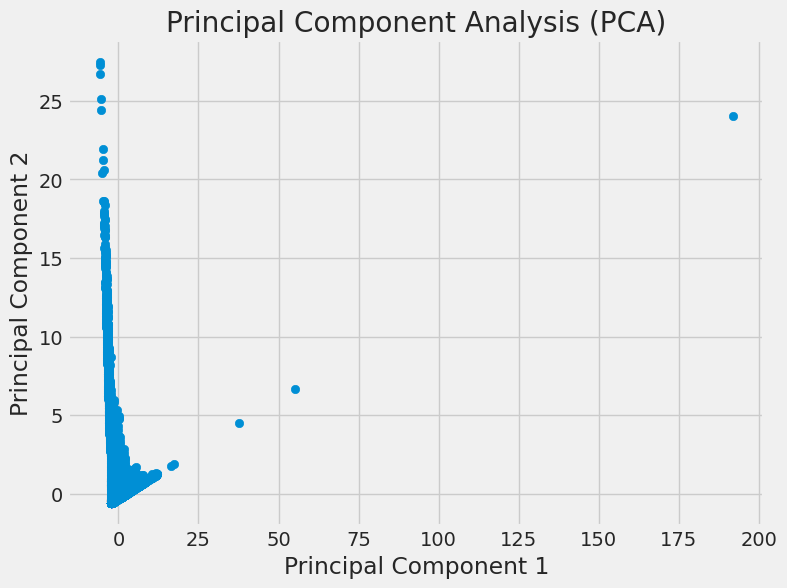

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.title('Principal Component Analysis (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print("\nPourcentage de variance expliquée par chaque axe (composante principale):")
for i, explained_variance in enumerate(explained_variance_ratio):
    print(f"Axe {i + 1}: {explained_variance * 100:.2f}%")


Pourcentage de variance expliquée par chaque axe (composante principale):
Axe 1: 80.64%
Axe 2: 19.04%


In [ ]:
PC1 = pca.fit_transform(data_scaled)[:,0]
PC2 = pca.fit_transform(data_scaled)[:,1]
ldngs = pca.components_

In [ ]:
scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = data_droped.columns

Text(0.5, 1.0, 'Figure 1')

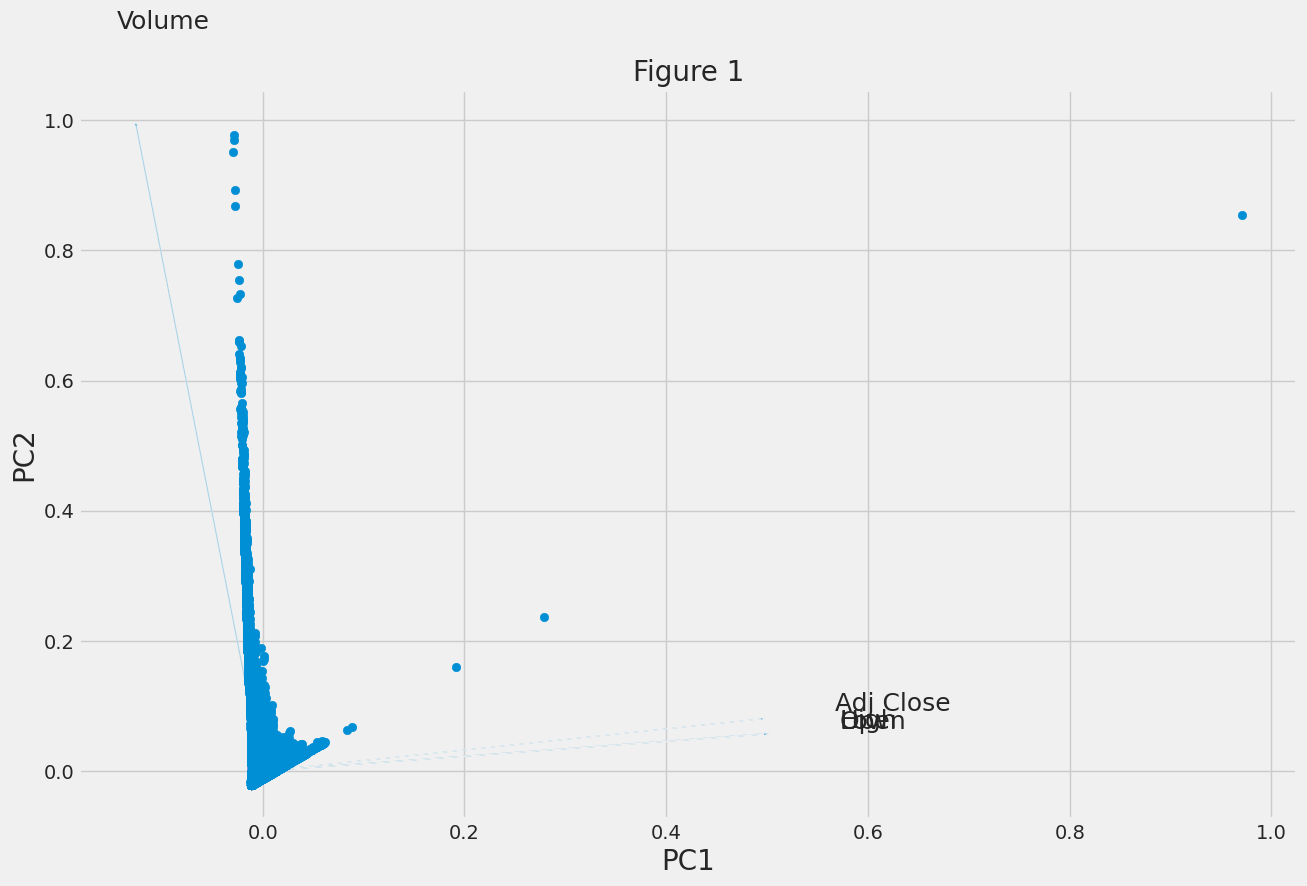

In [ ]:
fig, ax = plt.subplots(figsize=(14, 9))

for i, feature in enumerate(features):
    ax.arrow(0, 0, ldngs[0, i],
             ldngs[1, i])
    ax.text(ldngs[0, i] * 1.15,
            ldngs[1, i] * 1.15,
            feature, fontsize=18)

ax.scatter(PC1 * scalePC1,PC2 * scalePC2)

ax.set_xlabel('PC1', fontsize=20)
ax.set_ylabel('PC2', fontsize=20)
ax.set_title('Figure 1', fontsize=20)

Analyse of the dataSet


In [ ]:
!pip install pandas-ta
from scipy.stats import pearsonr
from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import kendalltau, spearmanr
import statsmodels.stats.multicomp as multi
import statsmodels.api as sm
import pandas_ta as ta
from statsmodels.formula.api import ols

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=1b9f37d93ad9e28666de65c1fb1c3526ac8d10981f59b060a0ef7fe72a8a8e7b
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas-ta


In [ ]:
df = data[data['Libellé'] == 'BTC'].drop(['Date', 'Libellé'], axis=1)

#Add some indicators

In [ ]:
df['RSI'] = ta.rsi(df['Adj Close'], lenght=15)
df['EMAF'] = ta.ema(df['Adj Close'], lenght=20)
df['EMAM'] = ta.ema(df['Adj Close'], lenght=100)
df['EMAS'] = ta.ema(df['Adj Close'], lenght=150)

df.dropna(inplace=True)

#Graphically project data 2 by 2

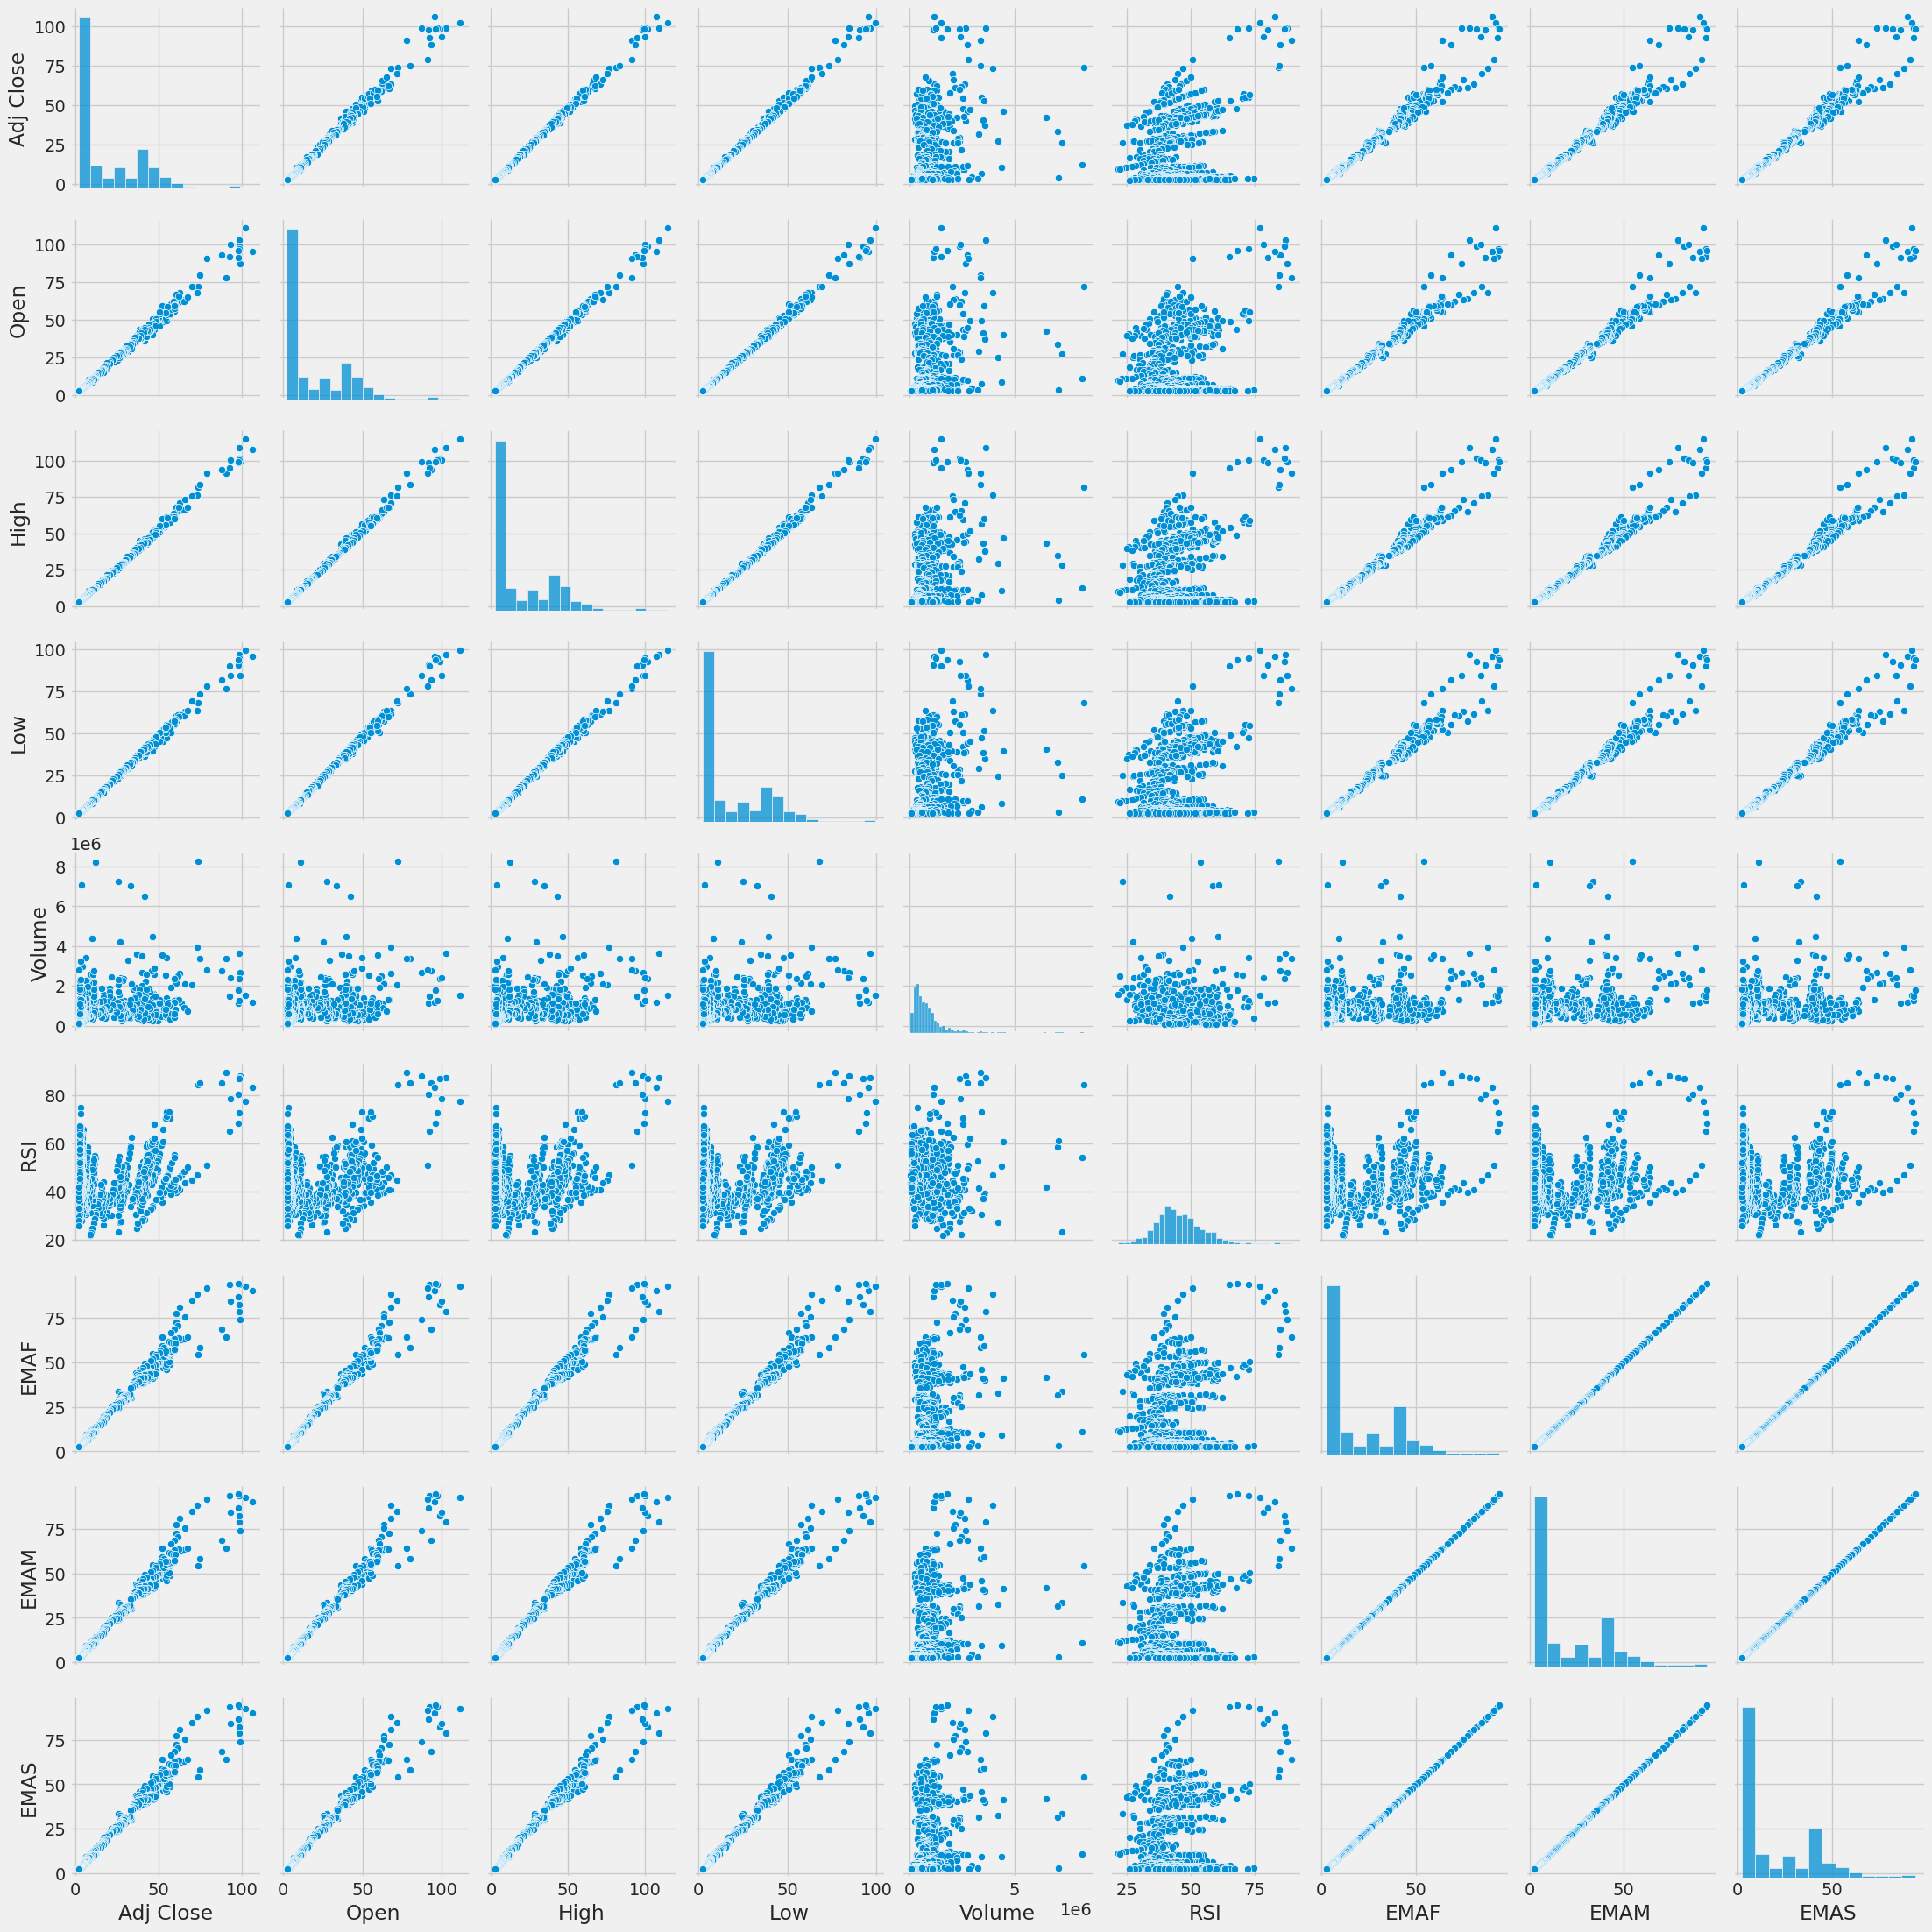

In [ ]:
sns.pairplot(df)

#Correlation matrix

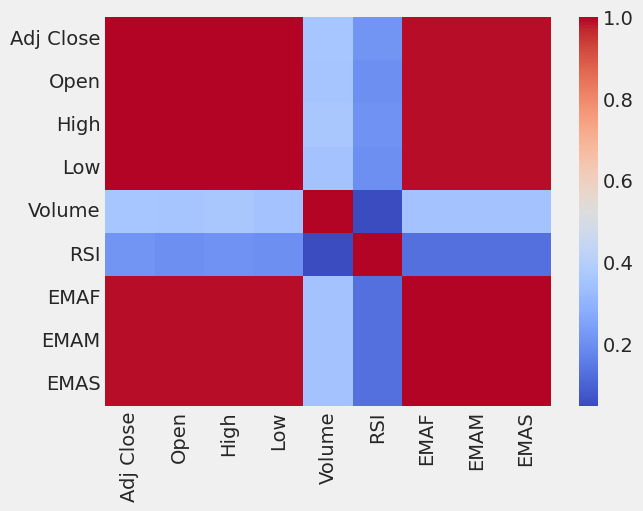

In [ ]:
df_corr = df.corr()
ax = sns.heatmap(df_corr, xticklabels = df_corr.columns ,
                 yticklabels = df_corr.columns, cmap = 'coolwarm')

#Person correlation test

**Volume vs Close**

~H0 : Independent variables if p-value > 5%

H1: Non-independent variables if p-value < 5%.

In [ ]:
pearsonr(df['Adj Close'], df['Volume'])

PearsonRResult(statistic=0.3579278705953089, pvalue=1.8399818385698556e-29)

**High vs Close**

~H0 : Independent variables if p-value > 5%

H1: Non-independent variables if p-value < 5%.

In [ ]:
pearsonr(df['Adj Close'], df['High'])

PearsonRResult(statistic=0.998979835047291, pvalue=0.0)

**High vs RSI**

~H0 : Independent variables if p-value > 5%

H1: Non-independent variables if p-value < 5%.

In [ ]:
pearsonr(df['Adj Close'], df['RSI'])

PearsonRResult(statistic=0.2143777761779967, pvalue=4.0500205782353476e-11)

**Volume vs RSI**

~H0 : Independent variables if p-value > 5%

H1: Non-independent variables if p-value < 5%.

In [ ]:
pearsonr(df['Volume'], df['RSI'])

PearsonRResult(statistic=0.04820036645308587, pvalue=0.14210464381289944)

**P-values Matrix**

In [ ]:
a = np.empty((len(df.columns),len(df.columns),))
a[:] = np.nan
for i in range(0,len(df.columns)):
    for j in range(0,len(df.columns)):
        a[i,j] = pearsonr(df.iloc[:,i], df.iloc[:,j])[1]

df_pvalue = round(pd.DataFrame(a, columns=df.columns, index = df.columns),50)

In [ ]:
df_pvalue

,Adj Close,Open,High,Low,Volume,RSI,EMAF,EMAM,EMAS
Adj Close,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.839982e-29,4.050021e-11,0.000000e+00,0.000000e+00,0.000000e+00
Open,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.040190e-29,1.187360e-09,0.000000e+00,0.000000e+00,0.000000e+00
High,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.442037e-31,7.241615e-11,0.000000e+00,0.000000e+00,0.000000e+00
Low,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.690596e-28,7.629883e-10,0.000000e+00,0.000000e+00,0.000000e+00
Volume,1.839982e-29,5.040190e-29,5.442037e-31,9.690596e-28,0.000000e+00,1.421046e-01,8.434245e-28,8.434245e-28,8.434245e-28
RSI,4.050021e-11,1.187360e-09,7.241615e-11,7.629883e-10,1.421046e-01,0.000000e+00,7.716646e-05,7.716646e-05,7.716646e-05
EMAF,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.434245e-28,7.716646e-05,0.000000e+00,0.000000e+00,0.000000e+00
EMAM,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.434245e-28,7.716646e-05,0.000000e+00,0.000000e+00,0.000000e+00
EMAS,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.434245e-28,7.716646e-05,0.000000e+00,0.000000e+00,0.000000e+00


#ANOVA

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
df_scaler = scaler.fit_transform(df)
df = pd.DataFrame(df_scaler, columns=df.columns)
df = df.rename(columns={'Adj Close': 'Close'})

In [ ]:
df.head(5)

,Close,Open,High,Low,Volume,RSI,EMAF,EMAM,EMAS
0,0.452872,0.405883,0.424166,0.445497,0.053651,0.392241,0.512712,0.512712,0.512712
1,0.456149,0.424670,0.422077,0.469583,0.033664,0.400876,0.513093,0.513093,0.513093
2,0.437163,0.440891,0.427054,0.443953,0.084704,0.353369,0.509498,0.509498,0.509498
3,0.428682,0.410832,0.405724,0.445805,0.057470,0.332679,0.504811,0.504811,0.504811
4,0.421261,0.408908,0.399591,0.433762,0.051223,0.314314,0.499449,0.499449,0.499449


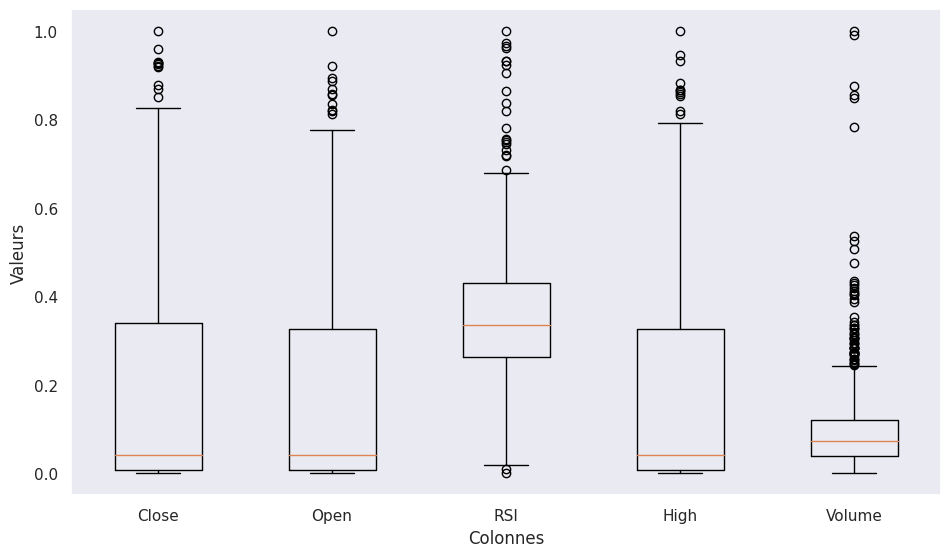

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['Close'], df['Open'], df['RSI'], df['High'], df['Volume']], labels=['Close', 'Open', 'RSI', 'High', 'Volume'])

plt.xlabel('Colonnes')
plt.ylabel('Valeurs')

plt.show()


#Residual normality

The Shapiro-Wilk test is used to test the normality of the residuals where :

H0: Residuals follow a normal distribution if p-value > 5%.

H1: Residuals do not follow a normal distribution if p-value < 5%.

In [ ]:
model = ols('Close ~ Open', data=df).fit()
shapiro(model.resid)

ShapiroResult(statistic=0.7011560201644897, pvalue=1.2183728506879783e-37)

In [ ]:
model = ols('Close ~ RSI', data=df).fit()
shapiro(model.resid)

ShapiroResult(statistic=0.8807263374328613, pvalue=4.252625880530034e-26)

In [ ]:
model = ols('Close ~ RSI', data=df).fit()
shapiro(model.resid)

ShapiroResult(statistic=0.7165669798851013, pvalue=6.477462914984466e-37)

In [ ]:
model = ols('Close ~ Volume', data=df).fit()
shapiro(model.resid)

ShapiroResult(statistic=0.8623777627944946, pvalue=9.466339529336891e-28)

In [ ]:
model = ols('Volume ~ RSI', data=df).fit()
shapiro(model.resid)

ShapiroResult(statistic=0.6733217835426331, pvalue=7.0574645532639e-39)

#Variances are significantly different?

H0: The variances of each group are equal if p-value > 5%

H1: The variances of each group are not all equal < 5%

In [ ]:
bartlett(df['Close'], df['Open'], df['High'])

BartlettResult(statistic=2.445249510826296, pvalue=0.29445627602671665)

In [ ]:
bartlett(df['Close'], df['Volume'])

BartlettResult(statistic=381.9905321059835, pvalue=4.587690035433413e-85)

#Annova between close open and rsi

H0: Means of each group are equal if p-value > 5%

H1: The means of each group are not all equal < 5%

In [ ]:
model = ols('Close ~ Open + RSI + Open:RSI', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Open,34.696937,1.0,184151.601976,0.000000e+00
RSI,0.011066,1.0,58.730874,4.559626e-14
Open:RSI,0.002987,1.0,15.853490,7.380608e-05
Residual,0.174284,925.0,NaN,NaN


Thus, we observe an interaction between the two variables. To measure which associations are significantly different from others, we can use Tukey's test. This test involves performing pairwise comparisons of means for each combination of associations.

To do this, we create a column with the combinations of the two factors.

In [ ]:
df['comb'] = df['Open'].astype('str') + '-' + df['RSI'].astype('str')
Results = multi.MultiComparison(df['Close'], df['comb'])
Results = Results.tukeyhsd()
print(Results)


/usr/local/lib/python3.10/dist-packages/statsmodels/sandbox/stats/multicomp.py:1300: RuntimeWarning: divide by zero encountered in divide
  st_range = np.abs(meandiffs) / std_pairs #studentized range statistic
